In [1]:
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_pickle('mse.pkl')
df = df.map(lambda x: np.mean(x))

df[['Randomforrest_log','ANN_log','Baseline_log']] = df.apply(lambda x: np.log(x))

df.mean()

Randomforrest        5.359444
ANN                  9.603214
Dummy                5.351190
Randomforrest_log    1.677510
ANN_log              2.153156
Baseline_log         1.677319
dtype: float64

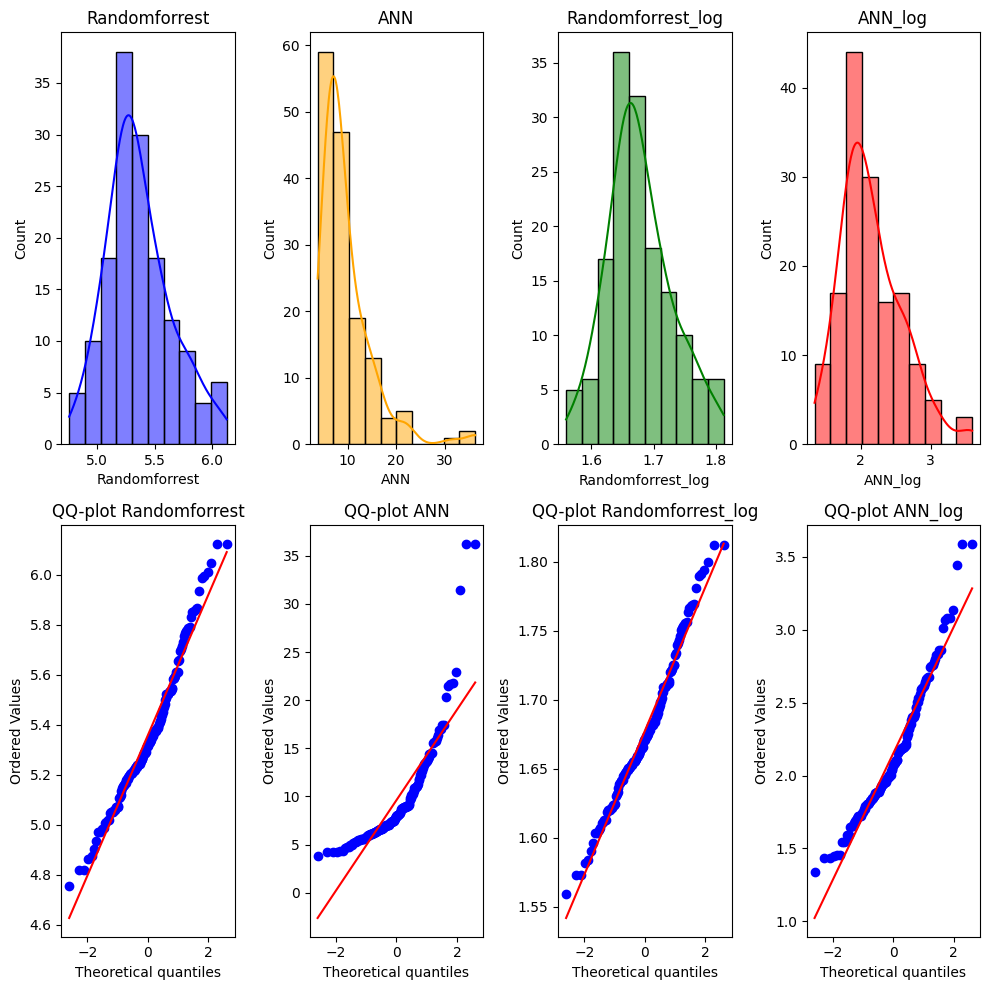

In [2]:
fig, axs = plt.subplots(2, 4, figsize=(10, 10))  # 2 rows, 4 columns

data = [df['Randomforrest'], df['ANN'],df['Randomforrest_log'], df['ANN_log']]
color = ['blue', 'orange', 'green', 'red']

# Histogram plots
for i in range(4):
    sns.histplot(data[i], color=color[i], bins=10,ax=axs[0, i], kde=True)
    axs[0, i].set_title(data[i].name)
# Q-Q plots
for i in range(4):
    stats.probplot(data[i], plot=axs[1, i])
    axs[1, i].set_title(f'QQ-plot {data[i].name}')

plt.tight_layout()
plt.show()

In [3]:
stats.shapiro(df['Randomforrest'][:45]), stats.shapiro(df['ANN'][:45]), stats.shapiro(df['Randomforrest_log'][:45]), stats.shapiro(df['ANN_log'][:45])

(ShapiroResult(statistic=0.9547449350357056, pvalue=0.07695027440786362),
 ShapiroResult(statistic=0.8712234497070312, pvalue=0.00013514244346879423),
 ShapiroResult(statistic=0.9626778960227966, pvalue=0.1544741839170456),
 ShapiroResult(statistic=0.9598901271820068, pvalue=0.12097981572151184))

Post hoc

In [4]:
stats.kruskal(df['Randomforrest_log'], df['ANN_log'], df['Baseline_log'])

KruskalResult(statistic=198.44575970809467, pvalue=8.091905472924996e-44)

In [5]:
stats.levene(df['Randomforrest_log'], df['ANN_log'], df['Baseline_log'])

LeveneResult(statistic=183.56960591716523, pvalue=6.3471408558581605e-59)

ttest

In [6]:
stats.wilcoxon(df['Randomforrest_log'], df['Baseline_log']), stats.wilcoxon(df['ANN_log'], df['Baseline_log']), stats.wilcoxon(df['Randomforrest_log'], df['ANN_log'])

(WilcoxonResult(statistic=5286.0, pvalue=0.567742189255103),
 WilcoxonResult(statistic=417.0, pvalue=7.430490452662092e-23),
 WilcoxonResult(statistic=445.0, pvalue=1.2518475411155535e-22))

In [9]:
from scipy.stats import ttest_rel

ttest_rel(df['Randomforrest_log'], df['Baseline_log']), ttest_rel(df['ANN_log'], df['Baseline_log']), ttest_rel(df['Randomforrest_log'], df['ANN_log'])

(TtestResult(statistic=0.04493121080730231, pvalue=0.9642222998242234, df=149),
 TtestResult(statistic=13.244435787924045, pvalue=5.9030340055878774e-27, df=149),
 TtestResult(statistic=-13.108050355999353, pvalue=1.360042885342976e-26, df=149))

In [7]:
# Adjust bonferroni correction
alpha = 0.05
n = 3
alpha_bonferroni = alpha / n
alpha_bonferroni

0.016666666666666666

In [18]:
# Table of normality tests
def conf(arr):
    avg = np.mean(arr)
    sd = np.std(arr)
    z = 1.96
    upper = + z * (sd / np.sqrt(len(arr)))
    lower = - z * (sd / np.sqrt(len(arr)))
    return avg, upper.round(2), lower.round(2)

conf(df['Randomforrest_log'][:45]), conf(df['Baseline_log'][:45]), conf(df['ANN_log'][:45])

((1.6709032662135952, 0.02, -0.02),
 (1.677319055068362, 0.0, -0.0),
 (2.111175012902256, 0.11, -0.11))